<a href="https://colab.research.google.com/github/koricasmolokom/Portfolio/blob/main/test_muratova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maternal Health Risk Data Set**

Задача: создать прогностическую модель рисков беременных.

Особенности: В последних ячейках необходимо вывести метрики и матрицу ошибок на трейне и тесте.

Описание:

- Age: Age in years when a woman is pregnant.
- SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
- HeartRate: A normal resting heart rate in beats per minute.
- Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install phik
import phik
import gdown

from pandas.plotting import scatter_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.2 MB/s eta 0:00:00


In [3]:
file_id = '1rKq9mfE7t20ppVJfR-gapgOlgJmg3OMd'

url = f'https://drive.google.com/uc?id={file_id}'

output = 'Maternal Health Risk Data Set.csv'

gdown.download(url, output, quiet=False)

data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1rKq9mfE7t20ppVJfR-gapgOlgJmg3OMd
To: /content/Maternal Health Risk Data Set.csv
100%|██████████| 30.3k/30.3k [00:00<00:00, 37.4MB/s]


In [4]:
display(data)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [6]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Далее внимательнее посмотрим на данные

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

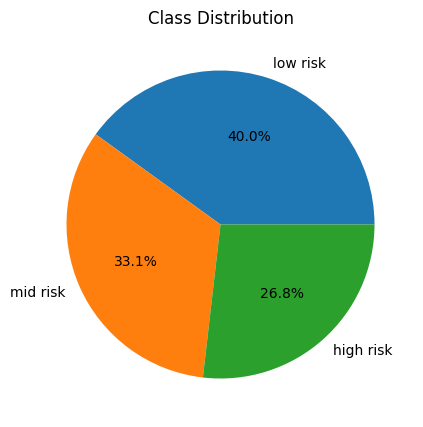

In [7]:
display(data['RiskLevel'].value_counts())

plt.figure(figsize=(5, 5))
data['RiskLevel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show();

Распределние возраста в выборке

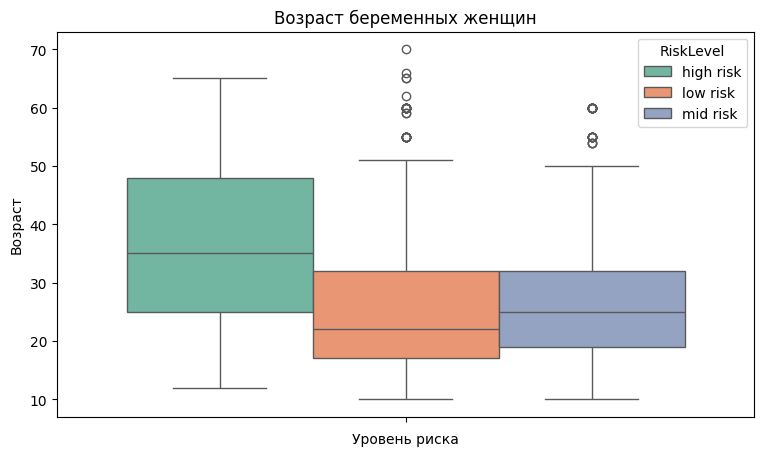

In [8]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=data, palette='Set2',hue='RiskLevel', y='Age', legend=True)
plt.title('Возраст беременных женщин')
plt.ylabel('Возраст')
plt.xlabel('Уровень риска')
plt.show();

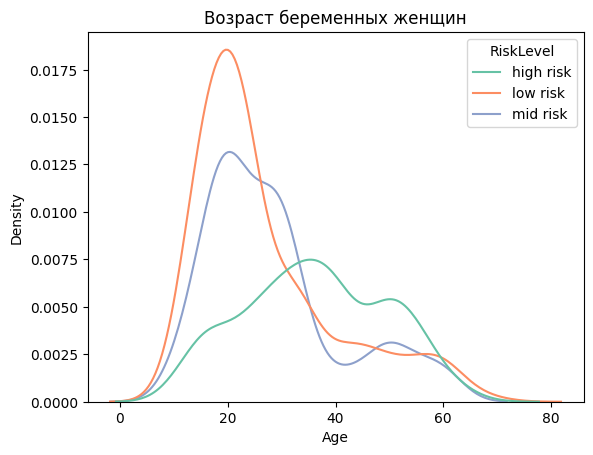

In [9]:
sns.kdeplot(data=data, hue='RiskLevel', x='Age', palette='Set2')
plt.title('Возраст беременных женщин')
plt.show();

На этих двух графиках видны очень странные вещи - у нас в выборке есть беременные, которым больше 60, в существовании чего я сильно сомневаюсь и, видимо, это ошибка. Поэтому я считаю, что нужно удалить все записи, где возраст женщины от 60. Та же логика для девушек младше 16 лет.

In [10]:
data = data[data['Age'] < 60]
data = data[data['Age'] > 15]

Распределение по классам

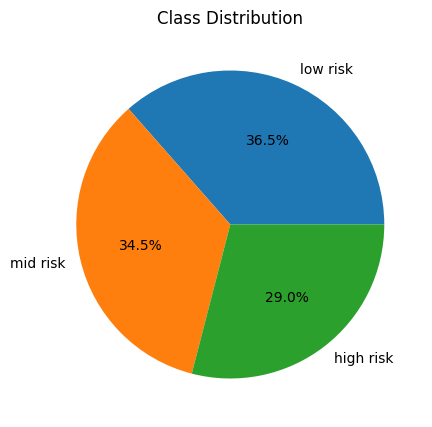

In [11]:
plt.figure(figsize=(5, 5))
data['RiskLevel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show();

Систолическое и диастолическое давление

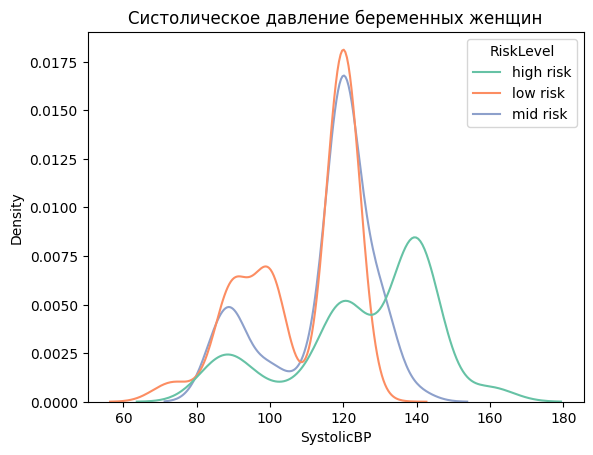

In [12]:
sns.kdeplot(data=data, hue='RiskLevel', x='SystolicBP', palette='Set2')
plt.title('Систолическое давление беременных женщин')
plt.show();

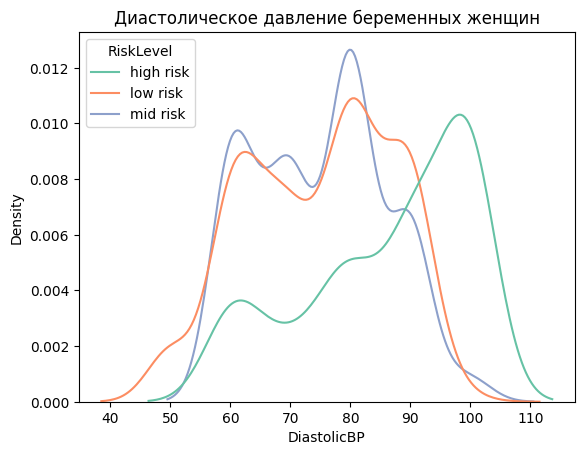

In [13]:
sns.kdeplot(data=data, hue='RiskLevel', x='DiastolicBP', palette='Set2')
plt.title('Диастолическое давление беременных женщин')
plt.show();

Предлагаю создать новый признак, который будет содержать разницу между систолическим и диастолическим давлением

In [14]:
data['PP'] = data['SystolicBP'] - data['DiastolicBP']

display(data.head())

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,PP
0,25,130,80,15.0,98.0,86,high risk,50
1,35,140,90,13.0,98.0,70,high risk,50
2,29,90,70,8.0,100.0,80,high risk,20
3,30,140,85,7.0,98.0,70,high risk,55
4,35,120,60,6.1,98.0,76,low risk,60


Посмотрим на этот столбец

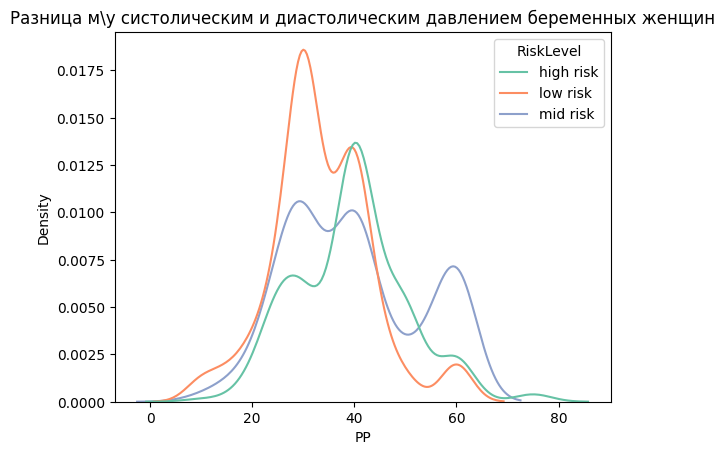

In [15]:
sns.kdeplot(data=data, hue='RiskLevel', x='PP', palette='Set2')
plt.title('Разница м\у систолическим и диастолическим давлением беременных женщин')
plt.show();

Уровень глюкозы

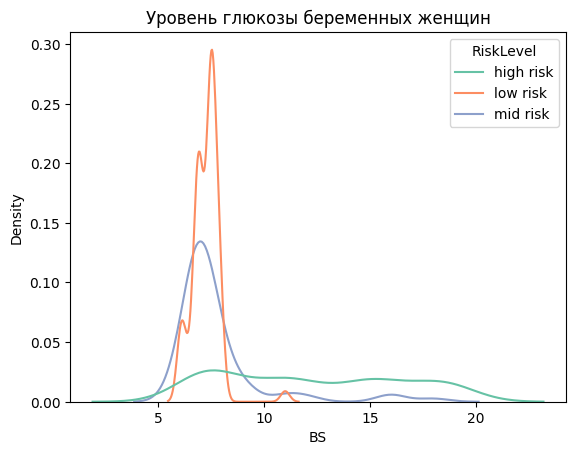

In [23]:
sns.kdeplot(data=data, hue='RiskLevel', x='BS', palette='Set2')
plt.title('Уровень глюкозы беременных женщин')
plt.show();

Температура тела

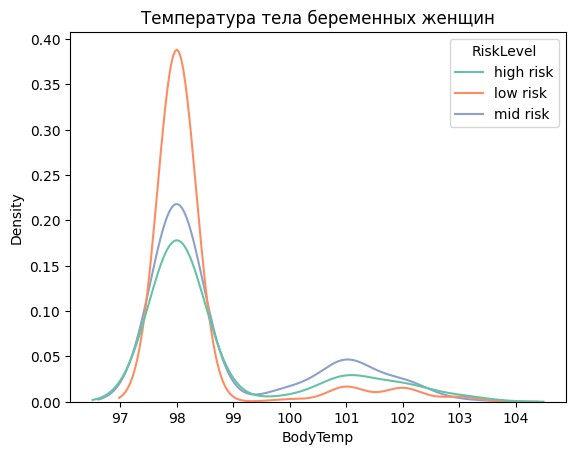

In [25]:
sns.kdeplot(data=data, hue='RiskLevel', x='BodyTemp', palette='Set2')
plt.title('Температура тела беременных женщин')
plt.show();

Пульс

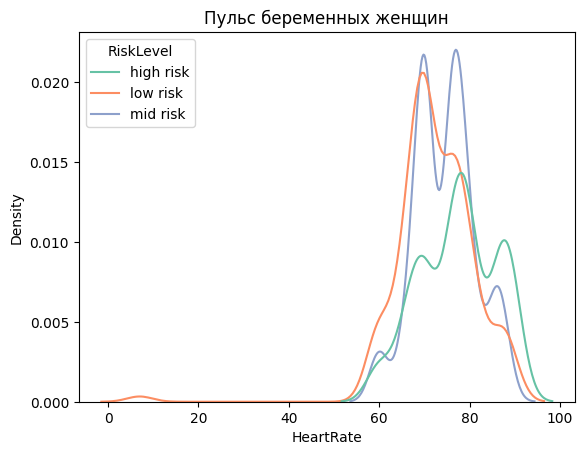

In [26]:
sns.kdeplot(data=data, hue='RiskLevel', x='HeartRate', palette='Set2')
plt.title('Пульс беременных женщин')
plt.show();

Меньше 40 ударов в минуту не может быть, тогда это либо ошибка, либо неправильно обработанный пропуск - надо удалять

In [27]:
data['HeartRate'].describe()

count    858.000000
mean      74.597902
std        8.258108
min        7.000000
25%       70.000000
50%       76.000000
75%       80.000000
max       90.000000
Name: HeartRate, dtype: float64

In [16]:
data = data[data['HeartRate'] > 40]

In [29]:
data.shape

(856, 8)

Добавление новых признаков

1. Среднее артериальное давление

In [19]:
data['medBP'] = data['DiastolicBP'] + ((data['PP'])* 0.3)

display(data.head())

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,PP,medBP
0,25,130,80,15.0,98.0,86,high risk,50,95.0
1,35,140,90,13.0,98.0,70,high risk,50,105.0
2,29,90,70,8.0,100.0,80,high risk,20,76.0
3,30,140,85,7.0,98.0,70,high risk,55,101.5
4,35,120,60,6.1,98.0,76,low risk,60,78.0


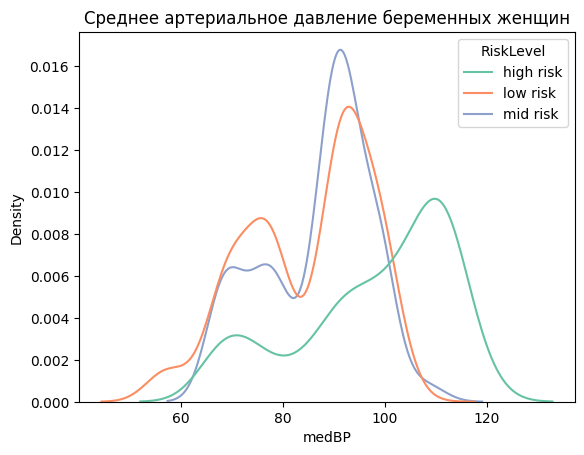

In [20]:
sns.kdeplot(data=data, hue='RiskLevel', x='medBP', palette='Set2')
plt.title('Среднее артериальное давление беременных женщин')
plt.show();

2. Наличие гипертонии

In [22]:
data['hypertonic'] = ((data['SystolicBP'] > 140) | (data['DiastolicBP'] > 90)).astype(int)

display(data.head())

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,PP,medBP,hypertonic
0,25,130,80,15.0,98.0,86,high risk,50,95.0,0
1,35,140,90,13.0,98.0,70,high risk,50,105.0,0
2,29,90,70,8.0,100.0,80,high risk,20,76.0,0
3,30,140,85,7.0,98.0,70,high risk,55,101.5,0
4,35,120,60,6.1,98.0,76,low risk,60,78.0,0


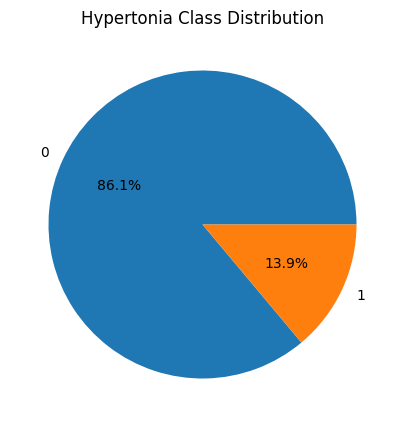

In [23]:
plt.figure(figsize=(5, 5))
data['hypertonic'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Hypertonia Class Distribution')
plt.ylabel('')
plt.show();

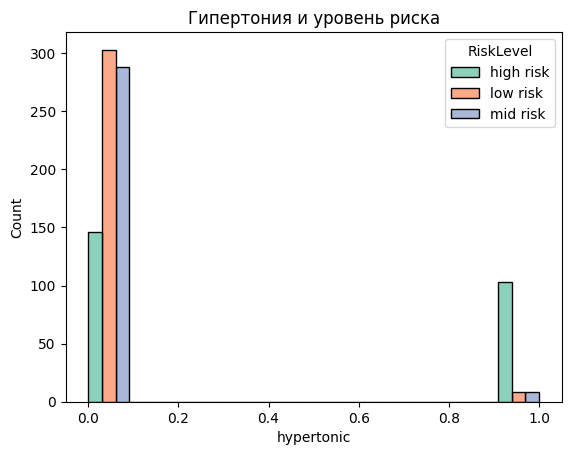

In [25]:
sns.histplot(data=data, x='hypertonic', hue='RiskLevel', multiple='dodge',  palette='Set2')
plt.title('Гипертония и уровень риска')
plt.show();

Матрица корреляций

In [26]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'PP', 'medBP', 'hypertonic'],
      dtype='object')

In [27]:
display(data.head())

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,PP,medBP,hypertonic
0,25,130,80,15.0,98.0,86,high risk,50,95.0,0
1,35,140,90,13.0,98.0,70,high risk,50,105.0,0
2,29,90,70,8.0,100.0,80,high risk,20,76.0,0
3,30,140,85,7.0,98.0,70,high risk,55,101.5,0
4,35,120,60,6.1,98.0,76,low risk,60,78.0,0


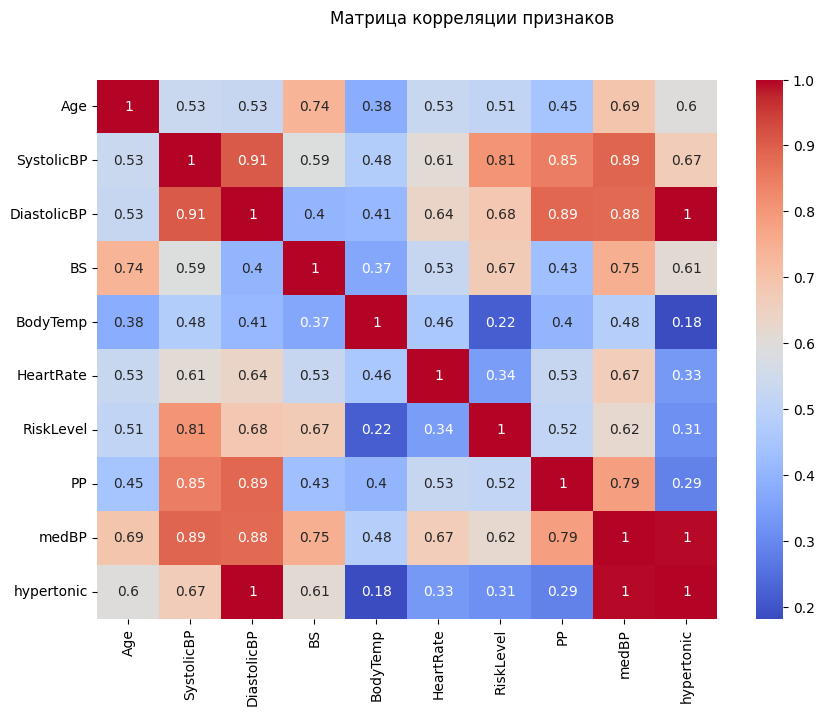

In [29]:
int_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', \
       'PP', 'medBP']

matrix = data.phik_matrix(interval_cols=int_cols)
plt.figure(figsize=(10,7))
plt.suptitle('Матрица корреляции признаков')
sns.heatmap(matrix, cmap="coolwarm", annot=True)
plt.show();